# Import Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

<img src="https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png" width=700>

In [2]:
# Load the Iris dataset from sklearn
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

df["Species"] = df.Species.str.replace("Iris-","")

# Map species to target label
name2label = {'setosa':0, 'versicolor':1, 'virginica':2}
label2name = {v:k for k, v in name2label.items()}


df['target'] = df.Species.map(name2label)

# Displaying the first five rows of the dataset
display(df.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,setosa,0
1,2,4.9,3.0,1.4,0.2,setosa,0
2,3,4.7,3.2,1.3,0.2,setosa,0
3,4,4.6,3.1,1.5,0.2,setosa,0
4,5,5.0,3.6,1.4,0.2,setosa,0


# Select Features

In [3]:
FEATURES = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
TARGET = ['target']

# Data Split

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.5, random_state=0)

# Train features and labels
x_train = train_df[FEATURES].values
x_train += np.random.uniform(size=x_train.shape) # add some noise
y_train = train_df[TARGET].values.ravel()

# Test features and labels
x_test = test_df[FEATURES].values
x_test += np.random.uniform(size=x_test.shape) # add some noise
y_test = test_df[TARGET].values.ravel()

# Define Metric

In [5]:
from sklearn.metrics import accuracy_score, classification_report

# K-Means

K-means clustering is a popular unsupervised machine learning algorithm used to partition a dataset into distinct groups or clusters based on their similarity. The algorithm aims to minimize the intra-cluster distance while maximizing the inter-cluster distance by iteratively assigning data points to the nearest cluster centroid and updating the centroids until convergence.

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png" width=600>

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_20/3708869757.py:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0]


Accuracy: 0.8933333333333333


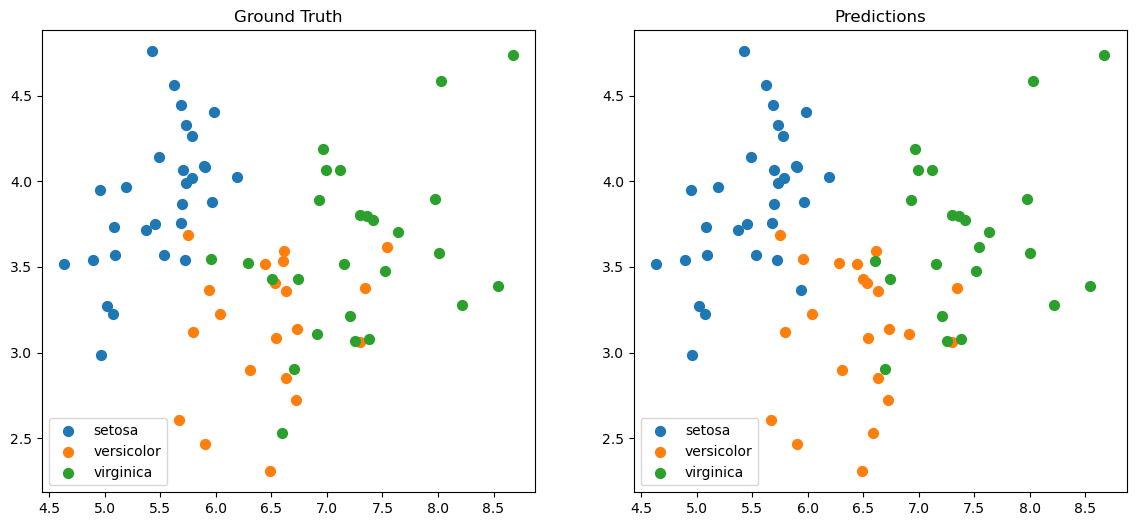

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt

# Create and fit KMeans model
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(x_train)

# Make predictions on the entire dataset
y_pred = kmeans_model.predict(x_train)

# Map predicted clusters to actual labels
labels = np.zeros_like(y_pred)
for i in range(3):  # Number of clusters
    mask = (y_pred == i)
    labels[mask] = mode(y_train[mask])[0]

# Calculate accuracy
accuracy = accuracy_score(y_train, labels)

# Print the evaluation results
print("Accuracy:", accuracy)

# Plotting the ground truth clusters
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
for i in range(3):
    plt.scatter(x_train[y_train == i, 0], x_train[y_train == i, 1], label=label2name[i], s=50)
plt.title("Ground Truth")
plt.legend()

# Plotting the predicted clusters
plt.subplot(1, 2, 2)
for i in range(3):
    plt.scatter(x_train[labels == i, 0], x_train[labels == i, 1], label=label2name[i], s=50)
plt.title("Predictions")
plt.legend()

plt.show()


We use the `mode` function in the K-Means clustering context to map the arbitrary cluster labels, assigned by the K-Means algorithm, to the actual labels in our dataset.

- **Why do we need mapping?** 

K-Means is an unsupervised machine learning algorithm, which means it doesn't have access to the actual labels of the data points. It forms clusters based on the similarity of data points and assigns labels based on the proximity to cluster centers. These labels assigned by K-Means may not correspond to the actual categories of our data points.

- **What if we don't map the labels?**

If you directly compare the labels predicted by the K-Means algorithm with the true labels for accuracy calculation, the result could be misleading due to this arbitrary labeling. 

- **How does `mode` help here?**

To solve this issue, for each cluster identified by K-Means, we find the most common true label (i.e., the mode) among the samples in that cluster. We then assign this most common true label to all data points in that particular cluster. This way, we "translate" the K-Means labels into our actual dataset labels, which allows us to calculate the accuracy in a way that truly reflects how well the K-Means clustering matches the actual groupings in our data.

- **An important note:**

This approach assumes that the true labels are known, which is not typically the case with unsupervised learning - where the goal is to discover hidden patterns or structures in unlabeled data. This method is used here mainly for illustrative purposes, and to enable us to calculate an "accuracy" for the K-Means algorithm.


# Hierarchical clustering - Agglomerative Clustering
<img src="https://miro.medium.com/v2/resize:fit:740/1*VvOVxdBb74IOxxF2RmthCQ.png" width=600>

/tmp/ipykernel_20/741177749.py:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0]


Accuracy: 0.92


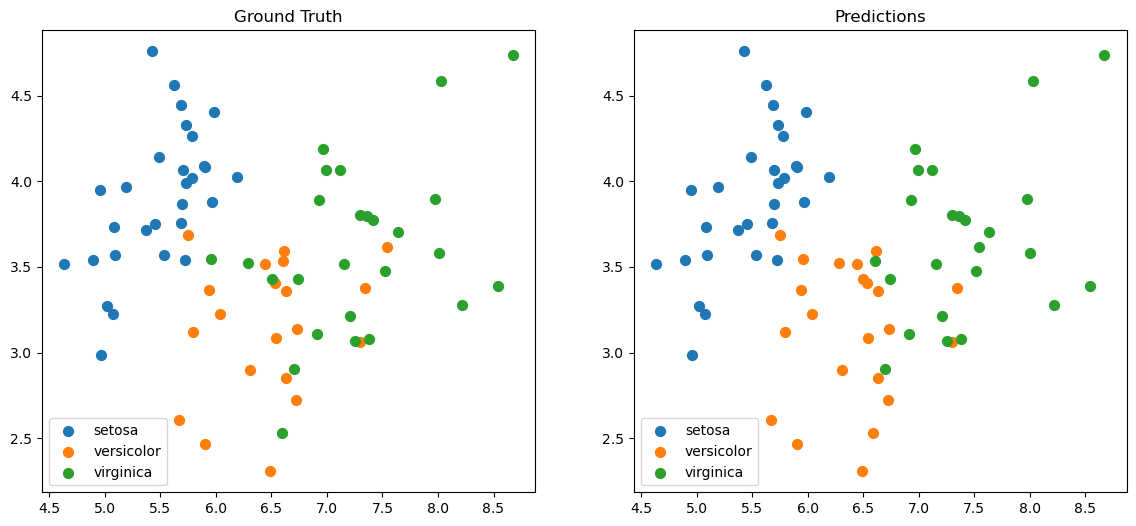

In [7]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt

# Create and fit Hierarchical clustering model
hierarchical_model = AgglomerativeClustering(n_clusters=3)
hierarchical_model.fit(x_train)

# Make predictions on the entire dataset
y_pred = hierarchical_model.labels_

# Map predicted clusters to actual labels
labels = np.zeros_like(y_pred)
for i in range(3):  # Number of clusters
    mask = (y_pred == i)
    labels[mask] = mode(y_train[mask])[0]

# Calculate accuracy
accuracy = accuracy_score(y_train, labels)

# Print the evaluation results
print("Accuracy:", accuracy)

# Plotting the ground truth clusters
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
for i in range(3):
    plt.scatter(x_train[y_train == i, 0], x_train[y_train == i, 1], label=label2name[i], s=50)
plt.title("Ground Truth")
plt.legend()

# Plotting the predicted clusters
plt.subplot(1, 2, 2)
for i in range(3):
    plt.scatter(x_train[labels == i, 0], x_train[labels == i, 1], label=label2name[i], s=50)
plt.title("Predictions")
plt.legend()

plt.show()


# Different Clustering Algorithms
There are many clustering algorithm avaiable. You can check them out [here](https://scikit-learn.org/stable/modules/clustering.html)

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png" width=1200>